In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

#print(sys.path)

In [2]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image


In [3]:
# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core.schmidt_solve import compute_schmidt_states
from core.schmidt_solve import compute_schmidt_states_all_time
from core.schmidt_solve import compute_schmidt_full
from core.schmidt_solve import compute_schmidt_states_new
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total

In [4]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.055; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 15; ind_nb = 100; log = 0
env_sys=0
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)

In [67]:
#testing the that there is no difference between compute_schmidt_full and one of the outputes of compute_schmidt_states_all_time. to do that first identify the needs of compute_schmidt_new
idx = 4

ss,se,sv=compute_schmidt_states_new(result, idx)

a = ss[1] #schmidt 1 on system 1
a = np.squeeze(a)
b = se[0] #schmidt 1 on system 2

ss_=np.squeeze(s_list[0][idx][1]) #first [] gives state for 0 and value for 1, second [] gives the time, third [] gives which Schmidt state, the 0'th 1st, ...
se_=np.squeeze(s_list[1][idx][0])
se_0=np.squeeze(s_list[1][idx][0])
se_1=np.squeeze(s_list[1][idx][1])

In [83]:
print(s_list[2][idx])
print(s_list[3][idx])

(0.9072232114554253, 0.09277678854457505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
(0.9072232114554253, 0.09277678854457505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


In [55]:
print(b)

[-6.74129454e-02+0.06543418j -1.26889492e-01+0.04840062j
 -2.86911924e-02+0.09503363j  9.74066324e-03+0.08404802j
  4.70757198e-02-0.03945644j -8.26206086e-02+0.06364683j
 -5.61132730e-02+0.00124212j  3.47826183e-02-0.04969787j
  1.59117869e-02-0.0701696j   3.59651555e-02-0.03007023j
  4.59833877e-03+0.03474995j -3.15716725e-02-0.09119799j
 -2.84822048e-02+0.00312493j -2.50464035e-02+0.05875853j
  3.87202297e-03-0.0277591j   8.74435963e-03-0.03171926j
 -5.38940090e-02-0.03942188j  6.52511242e-02+0.02388523j
 -1.34337256e-02-0.00316464j -1.04467041e-02+0.03892251j
  6.25876172e-02-0.02939677j -7.67249515e-02+0.06613299j
  2.24461941e-02-0.08072711j -1.09740594e-02+0.00227093j
 -8.52506331e-02+0.04113467j -8.13985520e-02-0.06647594j
 -1.70262123e-03+0.00645458j  2.75794443e-02-0.06045848j
 -5.69203712e-02-0.03960762j  5.64324588e-02+0.04133166j
 -1.38472267e-03+0.02308284j  4.15186430e-02+0.00115932j
  2.84702971e-02-0.08476382j  4.22609049e-02-0.03499442j
 -3.78622644e-02-0.00228879j -1

In [19]:

s1 = compute_schmidt_full(result, idx, 1)

s2 = s_list[][][]


SyntaxError: invalid syntax (2195115835.py, line 3)

In [5]:
path = gif_distribution_eig_total(result,eigen, info)
display_gif(path)

[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0]
../outputs/gifs/distrib_EI_[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0].gif


In [ ]:
gif_path = collapse_gif(eigen, s_list, info,env_sys)

display_gif(gif_path)


/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


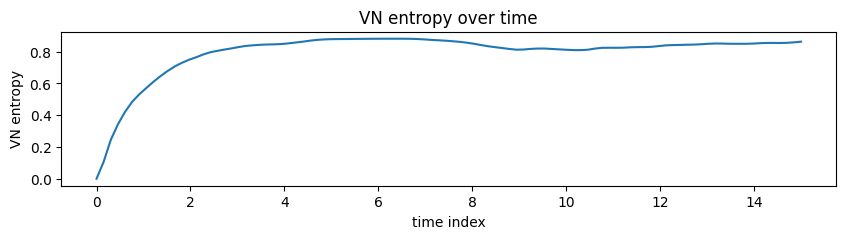

In [10]:
plot_VN(result,tlist,log=0)

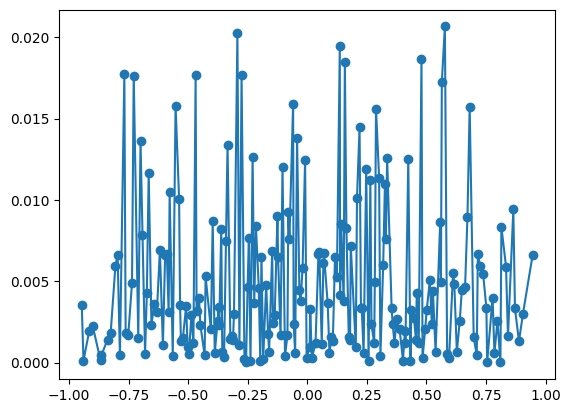

In [7]:

eigenenergies_system_2, eigenstates_system_2 = H_list[7].eigenstates() 
eigenenergies_system_total, eigenstates_system_total = H_list[1].eigenstates() 
eigenenergies_system_1, eigenstates_system_1 = H_list[6].eigenstates() 

# Plot 2: Distribution of the Environment state over the environment energy eigenstates
time_index = 10  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_2]
plt.plot(eigenenergies_system_2, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_2}')

    


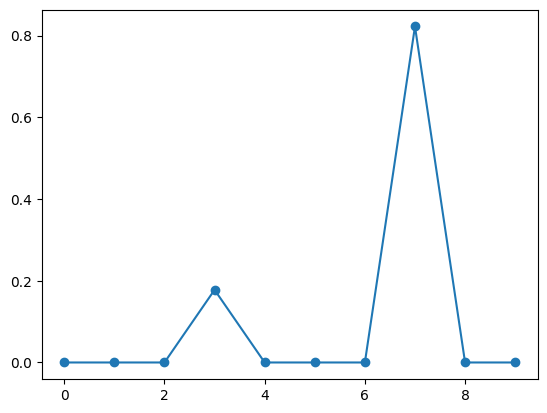

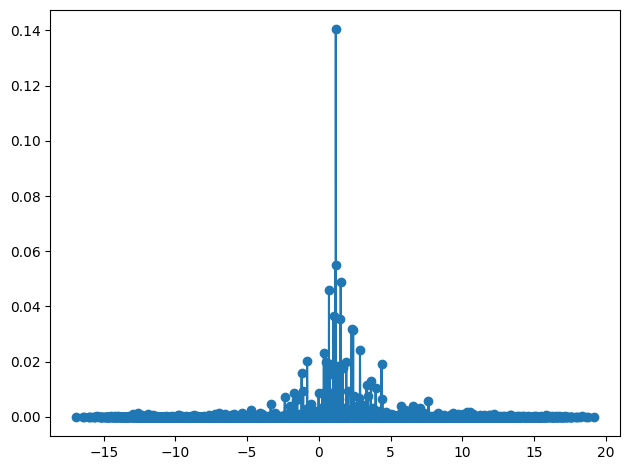

In [8]:
    # Plot 3: Distribution of the System state over the system energy eigenstates
    s0 = compute_schmidt_states(result, time_index, 0)[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_1]
    plt.plot(eigenenergies_system_1, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_1}')
    #axes[1, 0].set_title("Distribution of the System state over the system energy eigenstates")
    #axes[1, 0].set_xlabel("Energy Eigenstates")
    #axes[1, 0].set_ylabel("Schmidt Coefficients")
    plt.show()
    # Plot 4: Distribution of the state over the energy eigenstates
    s0 = result.states[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_total]
    plt.plot(eigenenergies_system_total, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_total}')
    #axes[1, 1].set_title("Distribution of the state over the energy eigenstates")
    #axes[1, 1].set_xlabel("Energy Eigenstates")
    #axes[1, 1].set_ylabel("Schmidt Coefficients")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()